**MSE(L2 loss，平方误差)**:
$$
MSE = \frac{1}{m}\sum_{i=1}^{m}{(\bar y_i - y_i)^2}
$$
$其中，m为样本数量，\bar y_i为标签，y_i为预测值$

**RMSE（均方误差）**
$$
RMSE = \sqrt{MSE}
$$

**MAE(L1 loss)**:
$$
MAE = \frac{1}{m}\sum_{i=1}^{m}{|\bar y_i - y_i|}
$$

MSE与MAE的比较：<br/>
1.异常值<br/>
对于训练集存在异常值的情况，MSE对异常值较敏感（因为异常值使得误差（$\bar y - y$）较大，而要对误差进行平方进一步增大了误差），因此异常值的梯度更大，会影响整体的收敛。而
MAE对于异常值相对没有那么敏感<br/>
2.MAE的缺点<br/>
MAE的梯度基本相等，体现在二维平面，即斜率相等，这回导致训练效果不好。而MSE的梯度在接近局部极小值时会逐渐减小（效率会越来越小），如下图所示
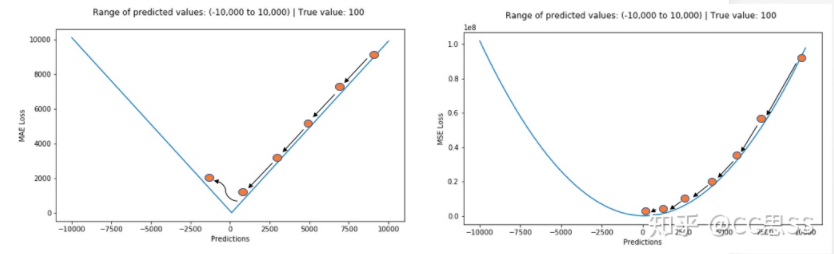
3.MSE与MAE的选用<br/>
当异常值是作为因为数据标注等原因而出现的噪声，则选用MAE这种对噪声更鲁棒的loss，同时配合学习率衰减以达到更好的效果。若异常值是有用的数据，则选用MSE。

**Huber损失（平滑平均绝对误差）：**<br/>
$$
 L_{\delta}(\bar y, y) = 
 \begin{cases}
 \frac{1}{2}(\bar y - y)^2, if |\bar y - y| <= \delta\\
 \delta |\bar y - y| - \frac{1}{2}\delta^2, otherwise
 \end{cases}
$$
$其函数图像在近0区间内近似MSE，其他区域近似MAE:$
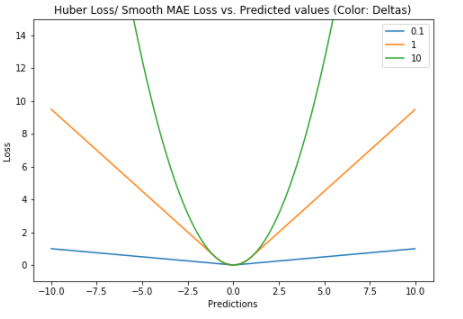

Huber损失的优点：结合了MSE与MAE的优点，既对异常值不敏感，有可学习率递减<br/>
缺点：引入了新的超参数，需要调参

**Log-cosh Loss**:
$$
L(\bar y, y) = \sum_{i=1}^{m}{log(cosh(\bar y - y))}
$$
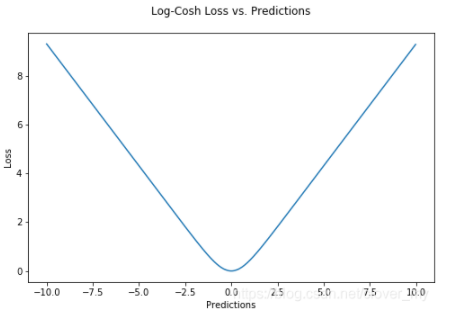

$og-cosh的优点：对于较小的x，近似于\frac{x^2}{2}，对于较大的x，近似于abs(x) - log(2)，这意味着\\log-cosh基本类似于均方误差，但不容易受到异常值的影响$<br/>
$log-cosh函数二阶处处可微，这在许多机器学习模型如XGBoost中有较多应用，\\XGBoost利用牛顿法进行优化，需要计算二阶导数$